In [76]:
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [78]:
df = pd.read_csv("Tweets.csv")

In [79]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [81]:
df.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [82]:
df['airline_sentiment'].value_counts()

airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64

In [83]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [84]:
def clean_tweet(text):
    # Convert to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)

    # Remove mentions and hashtags
    text = re.sub(r'\@\w+|\#','', text)

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Tokenize
    tokens = nltk.word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Join back to string
    cleaned_text = " ".join(tokens)
    return cleaned_text


In [85]:
df['cleaned_text'] = df['text'].apply(clean_tweet)

In [86]:
df[['text', 'cleaned_text']].head()

,text,cleaned_text
0,@VirginAmerica What @dhepburn said.,said
1,@VirginAmerica plus you've added commercials t...,plus youve added commercial experience tacky
2,@VirginAmerica I didn't today... Must mean I n...,didnt today must mean need take another trip
3,@VirginAmerica it's really aggressive to blast...,really aggressive blast obnoxious entertainmen...
4,@VirginAmerica and it's a really big bad thing...,really big bad thing


C:\Users\Admin\AppData\Local\Temp\ipykernel_3552\608977.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='airline_sentiment', order=['positive', 'neutral', 'negative'], palette='Set3')


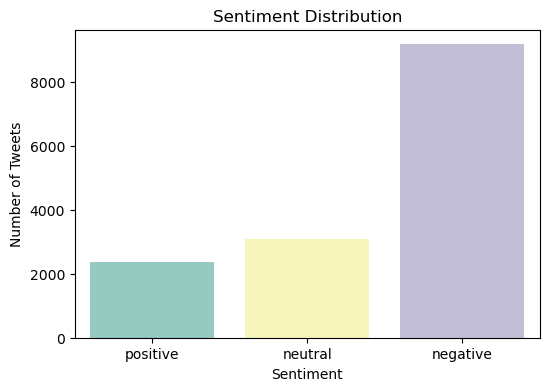

In [87]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='airline_sentiment', order=['positive', 'neutral', 'negative'], palette='Set3')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")
plt.show()

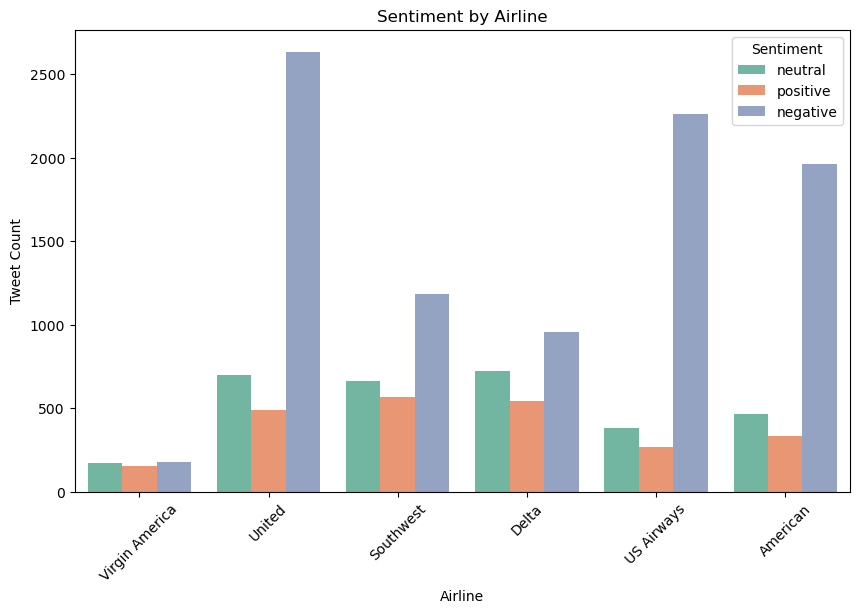

In [88]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='airline', hue='airline_sentiment', palette='Set2')
plt.title("Sentiment by Airline")
plt.xlabel("Airline")
plt.ylabel("Tweet Count")
plt.legend(title='Sentiment')
plt.xticks(rotation=45)
plt.show()

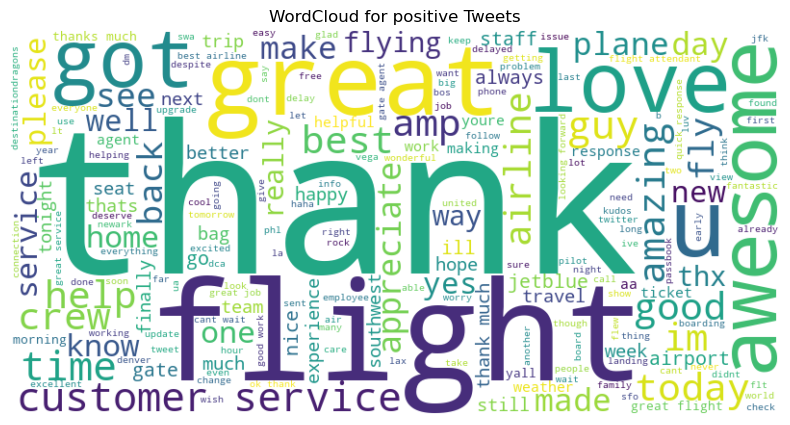

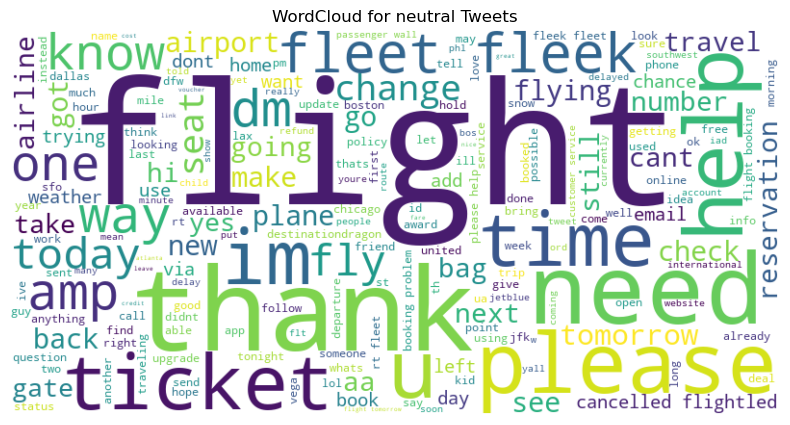

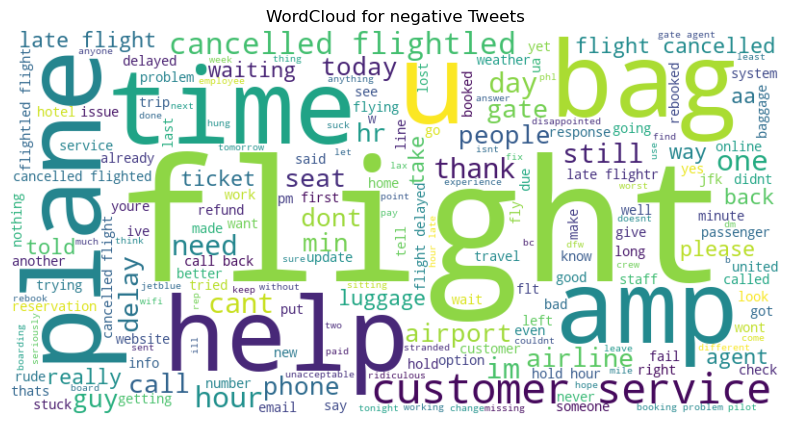

In [89]:
def show_wordcloud(sentiment):
    text = " ".join(df[df['airline_sentiment'] == sentiment]['cleaned_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud for {sentiment} Tweets")
    plt.show()

# Call for each sentiment
show_wordcloud('positive')
show_wordcloud('neutral')
show_wordcloud('negative')

In [90]:
#Basic ML Model on sentimental Data
#1. Logistic Regression
X = df['cleaned_text']   # Features (text)
y = df['airline_sentiment']  # Target (sentiment label)

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [92]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [93]:
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [94]:
y_pred = model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.798155737704918

Classification Report:
               precision    recall  f1-score   support

    negative       0.82      0.94      0.88      1889
     neutral       0.67      0.48      0.56       580
    positive       0.82      0.61      0.70       459

    accuracy                           0.80      2928
   macro avg       0.77      0.68      0.71      2928
weighted avg       0.79      0.80      0.79      2928


Confusion Matrix:
 [[1779   80   30]
 [ 270  277   33]
 [ 122   56  281]]


In [95]:
#2. Multinominal Naive Bayes
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [96]:
y_pred_nb = nb_model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))


Accuracy: 0.7315573770491803

Classification Report:
               precision    recall  f1-score   support

    negative       0.72      0.98      0.83      1889
     neutral       0.72      0.22      0.33       580
    positive       0.88      0.34      0.49       459

    accuracy                           0.73      2928
   macro avg       0.77      0.51      0.55      2928
weighted avg       0.75      0.73      0.68      2928


Confusion Matrix:
 [[1860   24    5]
 [ 438  125   17]
 [ 278   24  157]]


In [97]:
#3. Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)

y_pred_rf = rf_model.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred_rf))


Accuracy: 0.7745901639344263


In [98]:
#4. Support Vector Machine
from sklearn.svm import LinearSVC

svm_model = LinearSVC()
svm_model.fit(X_train_tfidf, y_train)

y_pred_svm = svm_model.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred_svm))


Accuracy: 0.7967896174863388


📌 Model Performance Summary – Sentiment Classification
This project explored multiple machine learning models to classify tweet sentiments (positive, neutral, negative) using the Twitter US Airline Sentiment dataset.

Model	Accuracy
Logistic Regression	80% ✅ (Best overall balance)
Support Vector Machine (SVM)	79%
Random Forest	77%
Multinomial Naive Bayes	73%

📉 Why Accuracy Isn’t Higher
The dataset is imbalanced, with far more negative tweets than neutral or positive.

Neutral sentiments are harder to classify due to their ambiguity and overlap with positive/negative expressions.

Tweets contain slang, sarcasm, and informal language, which are challenging for basic models to interpret without deeper context (like BERT or LSTM).

✅ Why Logistic Regression Was Chosen
Logistic Regression gave the best overall performance across all classes with reasonable precision and recall. It also offered faster training and better interpretability for this dataset.